## CALLS

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


In [24]:
df = pd.read_csv('911.csv')
df = df.drop('e',1)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 8 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


number of distinct zip codes:
104


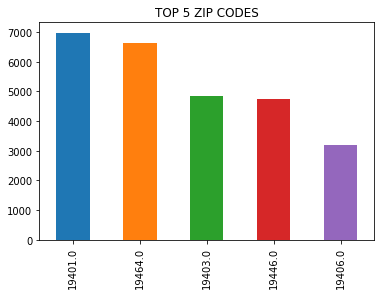

In [131]:
print('number of distinct zip codes:')
print df['zip'].nunique()
df['zip'].value_counts().head(5).plot.bar()
plt.title('TOP 5 ZIP CODES')
plt.show()

number of distinct title cases:
110


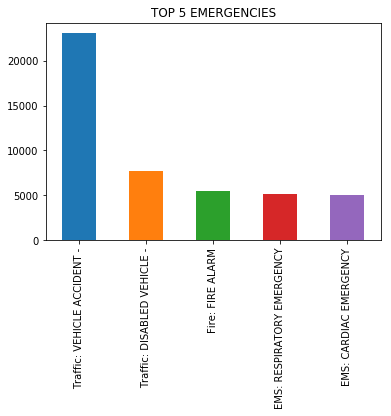

In [132]:
print('number of distinct title cases:')
print df['title'].nunique()
df['title'].value_counts().head(5).plot.bar()
plt.title('TOP 5 EMERGENCIES')
plt.show()

In [25]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Title'] = df['title'].apply(lambda x: x.split(':')[1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Title
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


number of distinct reasons for the call:
3


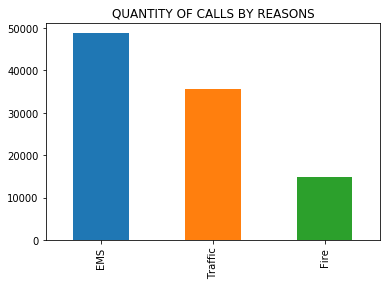

In [133]:
print('number of distinct reasons for the call:')
print df['Reason'].nunique()
df['Reason'].value_counts().head(5).plot.bar()
plt.title('QUANTITY OF CALLS BY REASONS')
plt.show()

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [56]:
df['day_week'] = df['timeStamp'].dt.day_name()
df['hour'] = df['timeStamp'].dt.hour
df['month'] = df['timeStamp'].dt.month
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Title,day_week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,Thursday,17,12


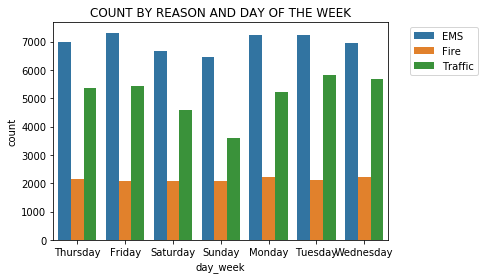

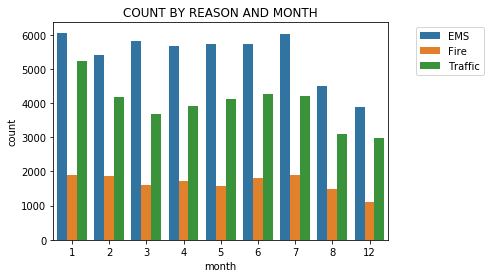

In [135]:
sns.countplot(data=df, x='day_week',hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('COUNT BY REASON AND DAY OF THE WEEK')
plt.show()
sns.countplot(data=df, x='month',hue='Reason')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('COUNT BY REASON AND MONTH')
plt.show()

In [91]:
day_hour = df.groupby(by=['day_week','hour']).count()['Reason'].unstack()
week_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour = day_hour.reindex(week_order)
day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_week,,,,,,,,,,,,,,,,,,,,,
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


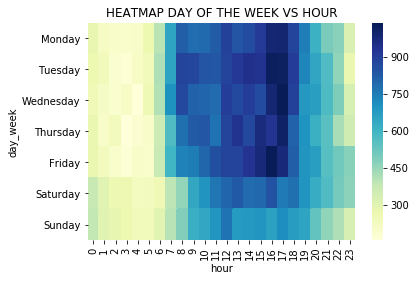

In [136]:
sns.heatmap(day_hour, cmap='YlGnBu')
plt.title('HEATMAP DAY OF THE WEEK VS HOUR')
plt.show()

    The hours with more emergencies are on working hours on working days.

In [99]:
day_month = df.groupby(by=['day_week','month']).count()['Reason'].unstack()
week_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_month = day_month.reindex(week_order)
day_month

month,1,2,3,4,5,6,7,8,12
day_week,,,,,,,,,
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907


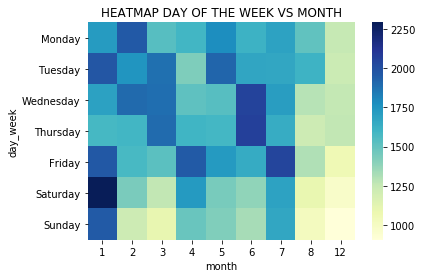

In [137]:
sns.heatmap(day_month, cmap='YlGnBu')
plt.title('HEATMAP DAY OF THE WEEK VS MONTH')
plt.show()

Doesn't seem to exists any strong relation between the months and the days of the week. As we seen before, working days have more emercency calls. A clear abnomal behaviour is found for January weekends. Taking a look on the internet we can google for natural deaseases on January 2016 at USA. The result is the storm Jonas, which hits USA on a January weekend.
https://en.wikipedia.org/wiki/January_2016_United_States_blizzard